## <u>Things we can do</u>

In [1]:
from gates import *
from matrix_functions import *
from IPython.display import display
from PIL import Image

### Take tensor product of H gate with I gate

In [2]:
print(H_GATE().mtensor(I_GATE()))

[0.7071067811865475, 0.0, 0.7071067811865475, 0.0]
[0.0, 0.7071067811865475, 0.0, 0.7071067811865475]
[0.7071067811865475, 0.0, -0.7071067811865475, -0.0]
[0.0, 0.7071067811865475, -0.0, -0.7071067811865475]



### Matrix multiplication of H gate with I gate

In [3]:
print(H_GATE().matrix_multiply(I_GATE()))

[0.7071067811865475, 0.7071067811865475]
[0.7071067811865475, -0.7071067811865475]



### Create CNOT_GATE with H & CV Gates

In [4]:
#CNOT_GATE = I_GATE().mtensor(H_GATE()).matrix_multiply(CV_GATE()).matrix_multiply(CV_GATE()).matrix_multiply(I_GATE().mtensor(H_GATE()))

### Create state vector |000| & multiply with test matrix

In [5]:
init_v = Vector([1, 0, 0 , 0, 0 , 0, 0, 0])
test = H_GATE().mtensor(I_GATE()).mtensor(H_GATE())
result = test.multiply_vector(init_v)
print(result)

[0.4999999999999999, 0.4999999999999999, 0.0, 0.0, 0.4999999999999999, 0.4999999999999999, 0.0, 0.0]


### Create qbits(0) or qbits(1) and tensor them together

In [6]:
# |0> qbit
q0 = qbit(0)

# |1> qbit
q1 = qbit(1)

# Tensor product
q1_q0 = q0.vtensor(q1)

print("q0:", q0)
print("q1:", q1)
print("Tensor Product:", q1_q0)

q0: [1, 0]
q1: [0, 1]
Tensor Product: [0, 1, 0, 0]


### Apply H gate to the qbits

In [7]:
# Apply H gate to qbits
q3 = H_GATE().multiply_vector(q0)
q4 = H_GATE().multiply_vector(q1)

print("q3:", q3)
print("q4:", q4)

q3: [0.7071067811865475, 0.7071067811865475]
q4: [0.7071067811865475, -0.7071067811865475]


### Initialise qbits

In [8]:
# Crate register with 3 zeros and 0 ones
zeros_ones = (2, 0)
num_zeros, num_ones = zeros_ones
custom_list = [0] * num_zeros + [1] * num_ones

qr = qprogram(num_zeros + num_ones, custom_list)
qr

[[1, 0], [1, 0]]

### Add gates to program and run

In [9]:
# Add H gates to qbit 0, 1
qr.addgates(0, [H_GATE()])
qr.addgates(1, [H_GATE()])

qr.addgates(0, [H_GATE()])
qr.addgates(1, [H_GATE()])

# Add CNOT gate to control qbit 0, tagret qbit 1
qr.addgates(0, [CNOT_GATE()], [1])

# Add H gates to qbit 0
qr.addgates(0, [H_GATE()])

# qr.viewgates()

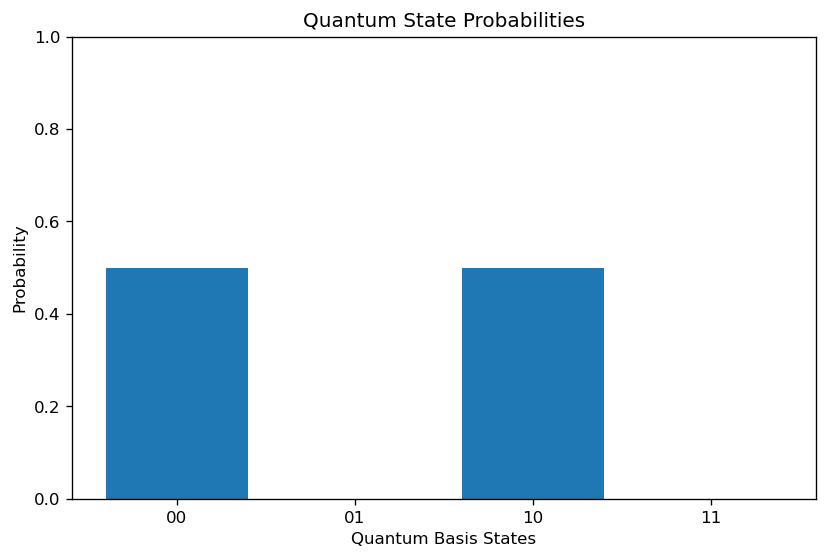

Quantum Program Output: [0.7071067811865472, 0.0, 0.7071067811865472, 0.0]


In [10]:
# Run program 
qr.run()

### It nearly works, just wrong basis states get the probabilities, it should be 00 and 01, not 00 and 10.

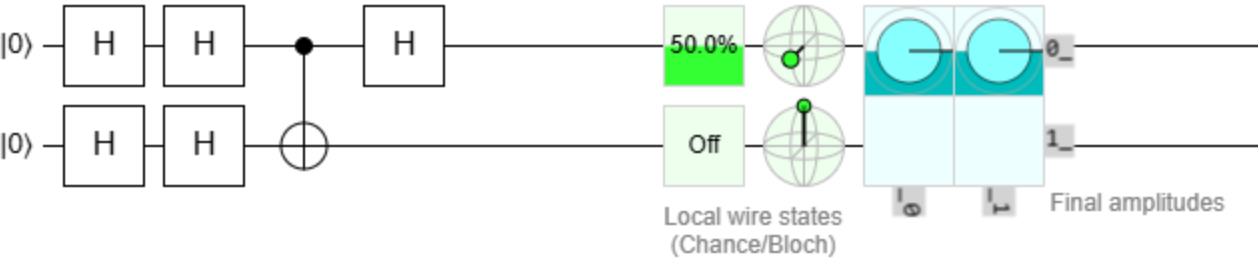

In [11]:
img = Image.open("Images/Test.png")
display(img)